## MatchingMarkets変更まとめ

In [1]:
using Plots
backend()

Plots.PyPlotBackend()

(以下ローカルでgitのbranchの切り替えを行っています.)
変更を加えていない時点での速度を計測します. proposer, responderともに100~1000人まで変化させます.　人数ごとに20回ループさせ,上位5回の平均をプロットします.

In [2]:
include("MatchingMarkets.jl/src/MatchingMarkets.jl")

MatchingMarkets

In [3]:
prop_prefs, resp_prefs = MatchingMarkets.random_prefs(10, 10)
MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)

([1, 3, 4, 0, 7, 8, 2, 10, 0, 9], [1, 7, 2, 3, 0, 0, 5, 6, 10, 8])

In [4]:
num_range = collect(100:200:1100)
loop = 20
elapsed = Array{Float64}(loop, length(num_range))

for (i, num) in enumerate(num_range)
    for l in 1:loop
        prop_prefs, resp_prefs = MatchingMarkets.random_prefs(num, num)
        _, elapsed[l, i], _, _ = @timed MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)
    end
end

average_time0 = squeeze(mean(sort(elapsed, 1)[1:loop-15, :], 1), 1)

6-element Array{Float64,1}:
 6.80318e-5 
 0.000551374
 0.00200331 
 0.00328174 
 0.00562945 
 0.00799929 


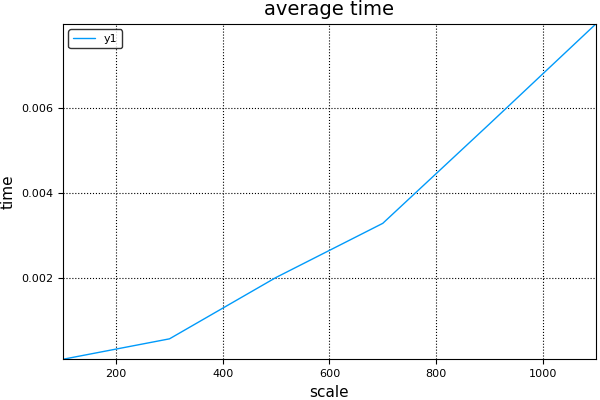

In [5]:
plot(num_range, 
    average_time0,
    xlabel="scale",
    ylabel="time",
    title="average time")

実装されているHeapをシンプルにして,responderが現在マッチしているproposerのランクだけを格納するようにしました.

In [6]:
include("MatchingMarkets.jl/src/MatchingMarkets.jl")

MatchingMarkets

In [7]:
prop_prefs, resp_prefs = MatchingMarkets.random_prefs(10, 10)
MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)

([1, 0, 2, 5, 0, 9, 0, 3, 7, 6], [1, 3, 8, 0, 4, 10, 9, 0, 6, 0])

In [8]:
num_range = collect(100:200:1100)
loop = 20
elapsed = Array{Float64}(loop, length(num_range))

for (i, num) in enumerate(num_range)
    for l in 1:loop
        prop_prefs, resp_prefs = MatchingMarkets.random_prefs(num, num)
        _, elapsed[l, i], _, _ = @timed MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)
    end
end

average_time1 = squeeze(mean(sort(elapsed, 1)[1:loop-15, :], 1), 1)

6-element Array{Float64,1}:
 7.22362e-5 
 0.000477851
 0.00158349 
 0.00298434 
 0.00524829 
 0.00778853 


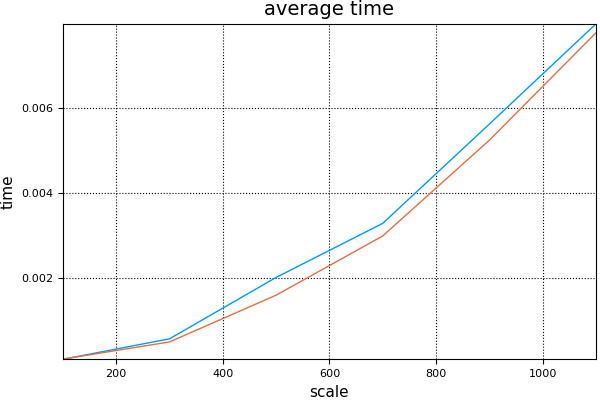

In [9]:
plot(num_range, 
    [average_time0, average_time1],
    xlabel="scale",
    ylabel="time",
    legend=false,
    title="average time")

マッチ相手を探しているpropsをスタック化してループを減らしてみました.

In [10]:
include("MatchingMarkets.jl/src/MatchingMarkets.jl")

MatchingMarkets

In [11]:
prop_prefs, resp_prefs = MatchingMarkets.random_prefs(10, 10)
MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)

([1, 0, 0, 2, 9, 6, 7, 5, 10, 8], [1, 4, 0, 0, 8, 6, 7, 10, 5, 9])

In [12]:
num_range = collect(100:200:1100)
loop = 20
elapsed = Array{Float64}(loop, length(num_range))

for (i, num) in enumerate(num_range)
    for l in 1:loop
        prop_prefs, resp_prefs = MatchingMarkets.random_prefs(num, num)
        _, elapsed[l, i], _, _ = @timed MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)
    end
end

average_time2 = squeeze(mean(sort(elapsed, 1)[1:loop-15, :], 1), 1)

6-element Array{Float64,1}:
 7.43734e-5 
 0.000465242
 0.000831006
 0.00178781 
 0.00367196 
 0.0050442  


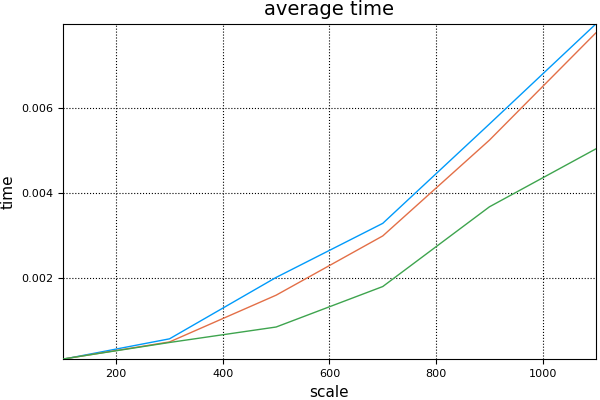

In [13]:
plot(num_range, 
    [average_time0, average_time1, average_time2],
    xlabel="scale",
    ylabel="time",
    legend=false,
    title="average time")

最後に@inboundsなどをつけたりして高速化

In [14]:
include("MatchingMarkets.jl/src/MatchingMarkets.jl")

MatchingMarkets

In [18]:
prop_prefs, resp_prefs = MatchingMarkets.random_prefs(10, 10)
MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)

([9, 7, 6, 10, 0, 8, 5, 3, 2, 4], [0, 9, 8, 10, 7, 3, 2, 6, 1, 4])

In [19]:
num_range = collect(100:200:1100)
loop = 20
elapsed = Array{Float64}(loop, length(num_range))

for (i, num) in enumerate(num_range)
    for l in 1:loop
        prop_prefs, resp_prefs = MatchingMarkets.random_prefs(num, num)
        _, elapsed[l, i], _, _ = @timed MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)
    end
end

average_time3 = squeeze(mean(sort(elapsed, 1)[1:loop-15, :], 1), 1)

6-element Array{Float64,1}:
 3.27672e-5 
 0.000364349
 0.000890883
 0.00160653 
 0.00342166 
 0.00454188 


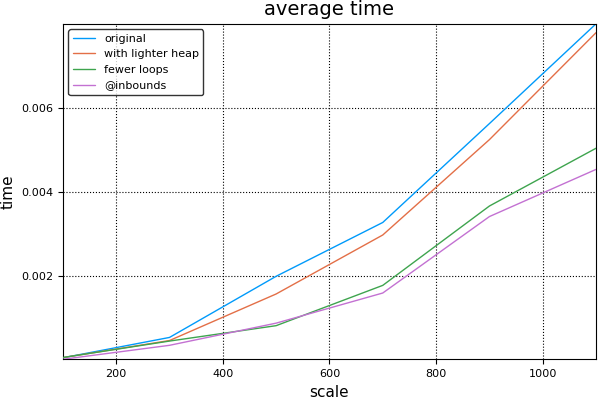

In [20]:
plot(num_range, 
    [average_time0, average_time1, average_time2, average_time3],
    xlabel="scale",
    ylabel="time",
    labels=reshape(["original", "with lighter heap", "fewer loops", "@inbounds"], 1, 4),
    title="average time")

プロファイリングをします.

In [21]:
num = 10000
prop_prefs, resp_prefs = MatchingMarkets.random_prefs(num, num)
MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)
Profile.clear()
@profile MatchingMarkets.deferred_acceptance(prop_prefs, resp_prefs)
Profile.print()

509 ./task.jl:335; (::IJulia.##11#14)()
 509 ...Julia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  509 ...rc/execute_request.jl:160; execute_request(::ZMQ.Socket, ::...
   509 ./loading.jl:515; include_string(::String, ::String)
    508 ./<missing>:?; anonymous
     508 ./profile.jl:23; macro expansion
      508 ...erred_acceptance.jl:203; deferred_acceptance(::Array{In...
       417 ...erred_acceptance.jl:66; deferred_acceptance(::Array{I...
        13  ...erred_acceptance.jl:261; _prefs2ranks(::Array{Int64,2})
        29  ...erred_acceptance.jl:264; _prefs2ranks(::Array{Int64,2})
        4   ...erred_acceptance.jl:265; _prefs2ranks(::Array{Int64,2})
        1   ...erred_acceptance.jl:266; _prefs2ranks(::Array{Int64,2})
        370 ...erred_acceptance.jl:268; _prefs2ranks(::Array{Int64,2})
       1   ...erred_acceptance.jl:90; deferred_acceptance(::Array{I...
        1 ./array.jl:442; collect(::Base.Generator{UnitR...
         1 ./array.jl:474; collect_to!(::Array{MatchingM...
      

やはりpreference matrixからrank matrixを作る関数に一番時間がかかっているようです.この関数_prefs2ranksの高速化を考えます.

In [22]:
function _prefs2ranks64(prefs::Matrix{Int})
    unmatched = 0
    ranks = similar(prefs)
    m, n = size(prefs)
    k::Int = 0
    for j in 1:n, i in 1:m
        @inbounds k = prefs[i, j]
        if k == unmatched
            @inbounds ranks[end, j] = i
        else
            @inbounds ranks[k, j] = i
        end
    end
    return ranks
end

_prefs2ranks64 (generic function with 1 method)

In [23]:
function _prefs2ranks32(prefs::Matrix{Int})
    unmatched = 0
    m, n = size(prefs)
    ranks = Matrix{Int32}(m, n)
    k::Int = 0
    for j in 1:n, i in 1:m
        @inbounds k = prefs[i, j]
        if k == unmatched
            @inbounds ranks[end, j] = i
        else
            @inbounds ranks[k, j] = i
        end
    end
    return ranks
end

_prefs2ranks32 (generic function with 1 method)

In [24]:
function _prefs2ranksU32(prefs::Matrix{Int})
    unmatched = 0
    m, n = size(prefs)
    ranks = Matrix{Int32}(m, n)
    k::Int = 0
    for j in 1:n, i in 1:m
        @inbounds k = prefs[i, j]
        if k == unmatched
            @inbounds ranks[end, j] = i
        else
            @inbounds ranks[k, j] = i
        end
    end
    return ranks
end

_prefs2ranksU32 (generic function with 1 method)

In [25]:
function _prefs2ranksU16(prefs::Matrix{Int})
    unmatched = 0
    m, n = size(prefs)
    ranks = Matrix{UInt16}(m, n)
    k::Int = 0
    for j in 1:n, i in 1:m
        @inbounds k = prefs[i, j]
        if k == unmatched
            @inbounds ranks[end, j] = i
        else
            @inbounds ranks[k, j] = i
        end
    end
    return ranks
end

_prefs2ranksU16 (generic function with 1 method)

配列への代入に時間がかかるので,配列の型を変更して比較します.

In [26]:
loop = 40
fs = [_prefs2ranks64, _prefs2ranks32, _prefs2ranksU32, _prefs2ranksU16]
labels = ["Int64", "Int32", "UInt32", "UInt16"]
f_elapsed = Array{Float64}(loop, length(fs))

for (i, f) in enumerate(fs)
    for l in 1:loop
        _, f_prefs = MatchingMarkets.random_prefs(1000, 1000)
        _, f_elapsed[l, i], _, _ = @timed f(f_prefs)
    end
end

average_time = squeeze(mean(sort(f_elapsed, 1)[1:loop-20, :], 1), 1)

4-element Array{Float64,1}:
 0.00241359
 0.00159344
 0.00161359
 0.00107798


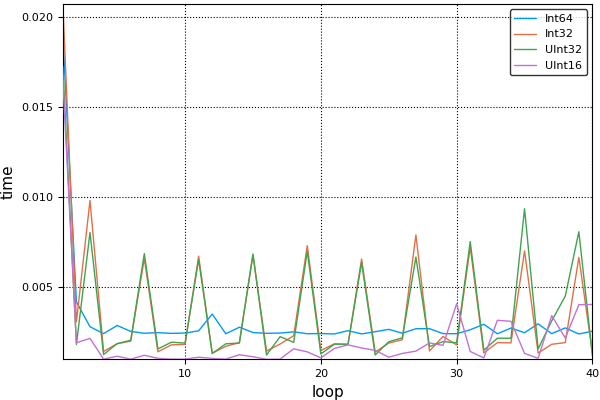

In [27]:
plot(f_elapsed, xlabel="loop", ylabel="time", label=reshape(labels, 1, length(labels)))


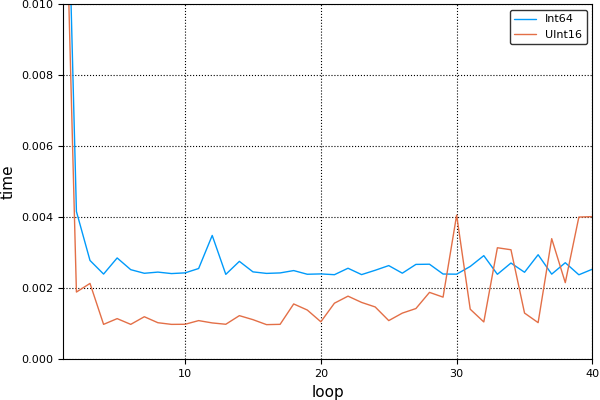

In [28]:
plot(f_elapsed[:, [1, 4]], xlabel="loop", ylabel="time", label=reshape(labels[[1, 4]], 1, 2), ylim=(0, 0.01))

[DA.jl](https://github.com/nswa17/DA.jl)の[結果](http://nbviewer.jupyter.org/github/nswa17/DA.jl/blob/master/Demo2017ex4.ipynb)と同じように,UInt16を使うとdeferred_acceptance関数も2倍ほど早くなると思われます.(deferred_acceptance関数のほとんどの時間がprefs->ranksにかかっているため)

が,UInt16を使用する場合,prop, respの数が共に2^6-1=65535以下という制限ができるのでMatchingMarketsには未実装です.

ちなみに,実装の影響からなのかUInt32を使うと速度が不安定になります.


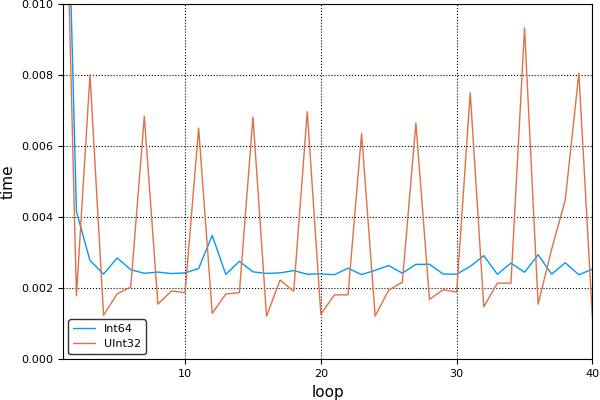

In [29]:
plot(f_elapsed[:, [1, 3]], xlabel="loop", ylabel="time", label=reshape(labels[[1, 3]], 1, 2), ylim=(0, 0.01))